In [28]:
from bls import get_series
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [19]:
data = pd.read_csv('data_1.csv')

In [20]:
data = data[(data.Year.str.contains('s')) == False]
data = data[(data.Month.str.contains('None')) == False]
data = data.replace('Sp-Oc', 'Sep')
data = data.replace('Jl-Au', 'Jul')
data

,Year,Month,States Affected and Category by States,Highest\nSaffir-\nSimpson\nU.S. Category,Central Pressure (mb),Max Wind (kt),Name
1,1851,Jun,"TX, C1",1.0,974.0,80,-----
2,1851,Aug,"FL, NW3; I-GA, 1",3.0,955.0,100,"""Great Middle Florida"""
3,1852,Aug,"AL, 3; MS, 3; LA, 2; FL, SW2, NW1",3.0,961.0,100,"""Great Mobile"""
4,1852,Sep,"FL, SW1",1.0,982.0,70,-----
5,1852,Oct,"FL, NW2; I-GA, 1",2.0,965.0,90,"""Middle Florida"""
...,...,...,...,...,...,...,...
351,2020,Sep,"AL, 2; FL, NW2",2.0,965.0,95,Sally
352,2020,Oct,"LA,2",2.0,970.0,85,Delta
353,2020,Oct,"LA,3; MS, 2; I-AL, 1",3.0,970.0,100,Zeta
354,2021,Aug,"LA,4",4.0,931.0,130,Ida


In [22]:
data.Month = pd.to_datetime(data.Month, format='%b').dt.month

In [24]:
data.columns =['Year', 'Month', 'States', 'Category', 'Pressure', 'Max Wind', 'Name']

In [36]:
data = data.astype({'Year': 'int', 'Max Wind': 'float'})
data = data.replace({'-----': np.NaN})
data['Category'].value_counts()

Category
1.0    123
2.0     84
3.0     63
4.0     28
5.0      4
Name: count, dtype: int64

array([[<Axes: title={'center': 'Year'}>]], dtype=object)

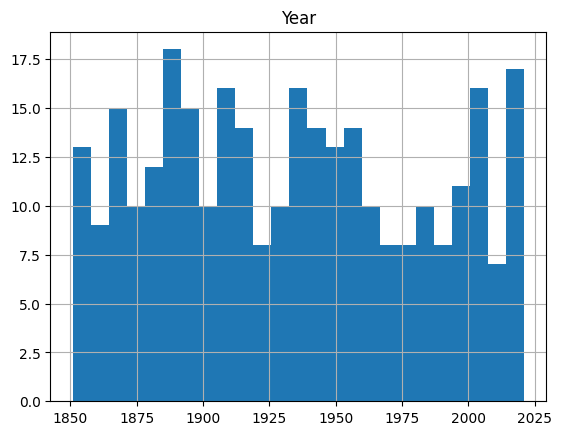

In [37]:
data.hist(column='Year', bins=25)

In [43]:
data_category = data[['Year','Category']]
data_wind = data[['Year','Max Wind']]
data_pressure = data[['Year','Pressure']]

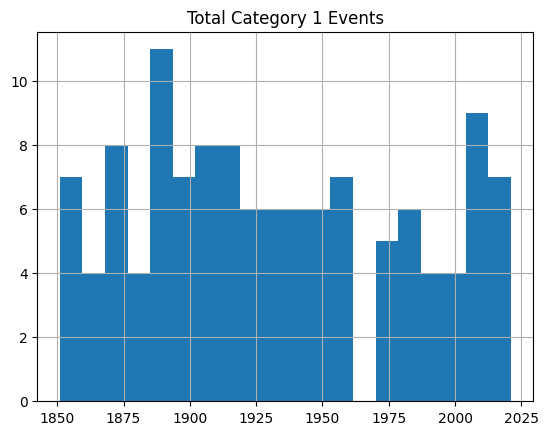

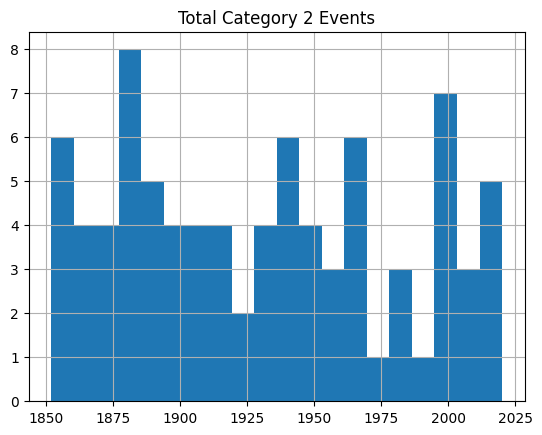

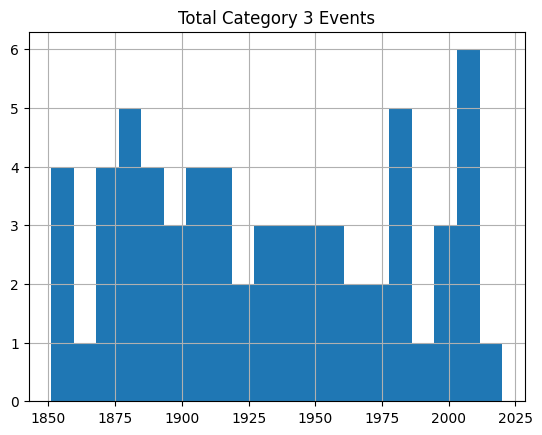

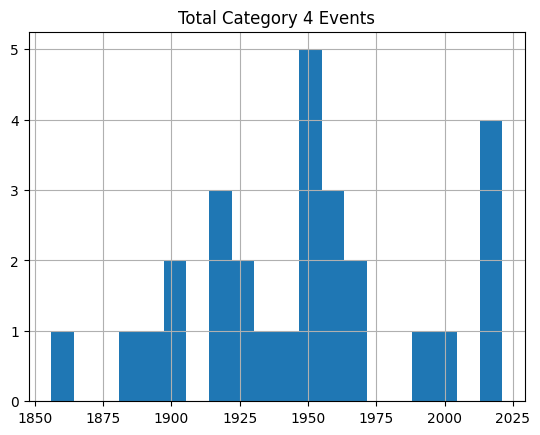

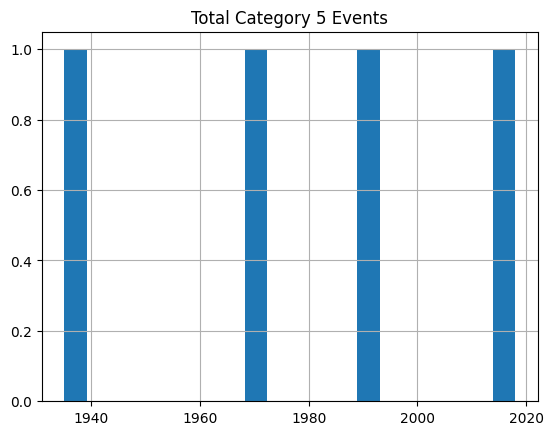

In [46]:
for x in range(1, 6):
    cat_num = x
    converted_num = str(cat_num)
    data_cat = data_category['Category'] == x
    data_1 = data_category[data_cat]
    data_1.hist(column='Year', bins=20)
    plt.title(f'Total Category {converted_num} Events')